Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "Clai101"

---

# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

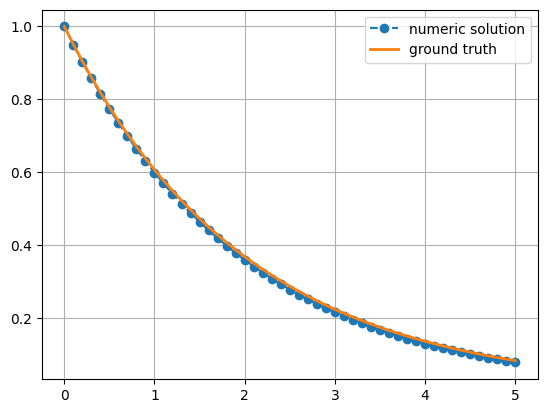

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Постройте решения как в ячейке выше для различных $\tau$ (в коде это `dt`), включая $|\lambda| \tau > 1$.

(1 point)

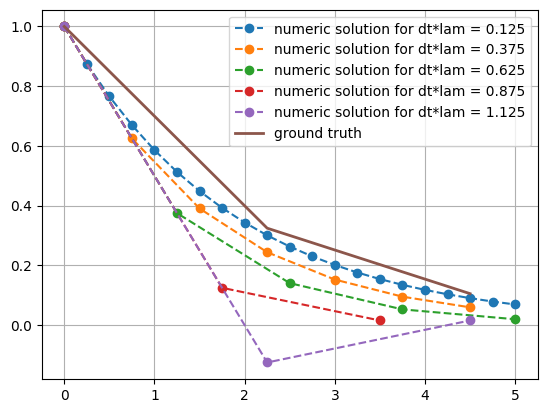

In [4]:
lam = -0.5
for dt in range(1, 10, 2):
    dt = dt/4
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=dt)
    plt.plot(tt, y, 'o--', label=f'numeric solution for dt*lam = {dt*np.abs(lam)}')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя неявную схему Эйлера. Сравните поведение неявной и явной схем Эйлера. Обсудите.

(1 point)

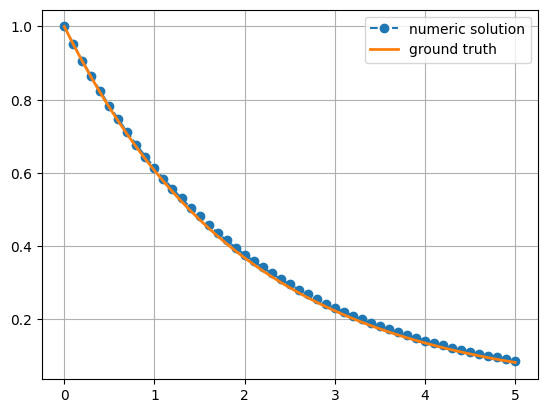

In [5]:
def euler(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1-lam*dt)
    return tt, y

lam = -0.5
tt, y = euler(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $ A = const $ - известная матрица $ 2 \times 2$.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [6]:
def euler_solve_(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros([len(u0), num_steps+1])
    y[:,0] = u0
    for k in range(num_steps):
        y[:,k+1] = y[:,k] + np.matmul(dt*A, y[:,k])
    return tt, y

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(1 point)

array([  -9.34647667, -499.65352333])

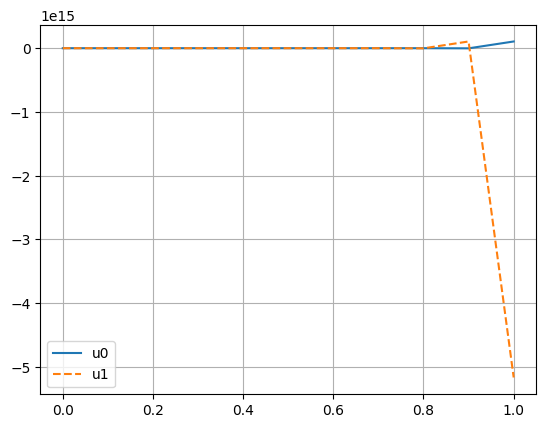

In [7]:
A = np.array([[-10, 10], [32, -499]])
tt, y = euler_solve_(A, np.array([1, 0]), 1, 0.1)
plt.plot(tt, y[0], label="u0")
plt.plot(tt, y[1], "--", label="u1")
plt.legend(loc='best')
plt.grid(True)

np.linalg.eigvals(A)

### Тест II.2

Реализуйте $\textit{неявную}$ схему Эйлера для системы уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(1 point)

array([  -9.34647667, -499.65352333])

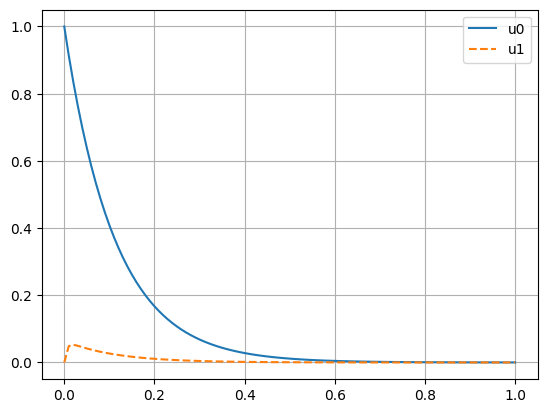

In [8]:
A = np.array([[-10, 10], [32, -499]])
def implicit_euler_solve_(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros([len(u0), num_steps+1])
    y[:,0] = u0
    for k in range(num_steps):
        y[:, k+1]= np.matmul(np.linalg.inv(np.eye(len(u0)) - dt * A), y[:, k])
    return tt, y

tt, y = implicit_euler_solve_(A, np.array([1, 0]), 1, 0.01)
plt.plot(tt, y[0], label="u0")
plt.plot(tt, y[1], "--", label="u1")
plt.legend(loc='best')
plt.grid(True)

np.linalg.eigvals(A)

# III. Модель Ланкастера

Рассмотрим модель Ланкастера: две армии, численность которых $x_1(t)$
и $x_2(t)$ соответственно, истребляют друг друга:

$$
\begin{cases}
\frac{d\,x_1}{dt} = - c_2 x_2,\\
\frac{d\,x_2}{dt} = - c_1 x_1
\end{cases}
$$

Война заканчивается в момент времени $T$, если численность какой-то из армий становится равна нулю $x_i(T)=0$ .


Для удоства будем исчилять время в $1/c_1$, тогда далее везде считаем $c_1=1, c_2=c$.

$$
\frac{d}{dt}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}= 
\begin{pmatrix}
0& -c\\
-1& 0
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$$
Можно явно выписать решение, найдя характеристические числа и собственные вектора
$$
\mathbf{x} = \sum_\pm C_{\pm}\mathbf{e_\pm} e^{\lambda_{\pm}t}, \; \lambda_{\pm} = \pm \sqrt{c}, \mathbf{e}_{\pm} = (\mp \sqrt{c}, 1)
$$

### Тест III.1 
Однако, если нас интересуют фазовые траектории(например кто победит), достаточно заметить, что у этой системы есть первый интеграл движения $I(x,y)=const$ (она Гамильтонова).

Найдите его, какая начальная численность первой армии $x_1(0)$ необходима для её победы? $x_{1min}(c, x_2(0))$

$$\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
= 
C_1 \begin{pmatrix} -\sqrt{c} \\ 1 \end{pmatrix} exp(t \sqrt{c}) + 
C_2 \begin{pmatrix} \sqrt{c} \\ 1 \end{pmatrix} exp(-t \sqrt{c}) 
$$
$$I = \cfrac{x_1^2}{c} - x_2^2 = 2 C_1 C_2 (\cfrac{1}{\sqrt{c}} - 1)$$
Если $x_1$ победила то:
$$ \cfrac{x_1^2}{c} =  2 C_1 C_2 (\cfrac{1}{\sqrt{c}} - 1) > 0$$
$$\begin{pmatrix} x_1(0) \\ x_2(0) \end{pmatrix}
= 
C_1 \begin{pmatrix} -\sqrt{c} \\ 1 \end{pmatrix} + 
C_2 \begin{pmatrix} \sqrt{c} \\ 1 \end{pmatrix}
$$
$$x_1(0) > x_2(0) \sqrt{c}$$

### Тест III.2

Поробуем численно решить задачу для $c=2, x_2(0)=1$ при трёх начальных $x_1(0) = x_{1min}(c=2,x_2(0)=1)\times[1+10^{-2}, 1+ 10^{-1}, 2]$. 

Подправьте явную или неявную схему Эйлера так, чтобы она интегрировала до момента победы.
Реализуйте схему Рунге - Кутта второго порядка с тем же требованием.


**Постройте в двойном логарифмическом масштабе отклонение $I(T)$ от истинного значения
$\delta I = |I(x(T),y(T)) - I(x_1(0),x_2(0)|$ , в зависимости от шага интегрирования $\tau$** проинтегрировав 
* Методом Эйлера для трёх указнных $x_1(0)$ и различных $\tau$
* Методом Рунге - Кутта для трёх указанных $x_1(0)$ и различных $\tau$

(Должно быть 6 линий на графике - двумя методами каждую из $x_1(0)$)

(Используйте сплошные линии для Эйлера и пунктирные для РК, цветом различайте начальные $x_1(0)$)

(Шаги интегрирования $\tau$ удобно уменьшать как $2^{-N}$ или сгенерировать как `np.logspace` )

*Как полученные кривые соотносятся с теоретическим порядком аппроксимации схем?*


(4 point)

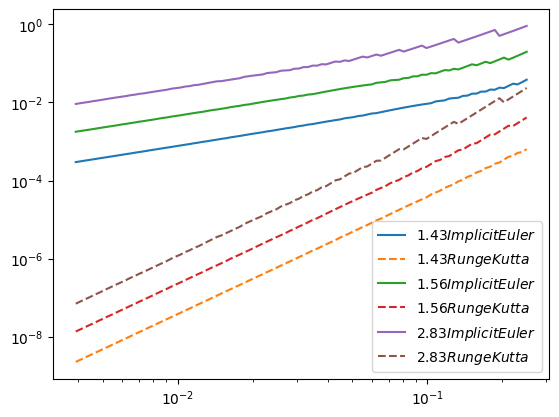

In [5]:
def rungeKutta(u0, dt):
    y = u0
    while(y[0] > 0 and y[1] > 0):
        k1 = dt * np.matmul(A, y)
        k2 = dt * np.matmul(A, y + k1)
        y = y + (k1 + k2) / 2
    return y

def implicit_euler_solve_(u0, dt):
    y = u0
    while(y[0] > 0 and y[1] > 0):
        y = list(np.matmul(np.linalg.inv(np.eye(u0.shape[0]) - dt * A), y))
    return np.array(y)

c = 2
date = np.array([[2**0.5 * (1 + 0.01), 1], [2**0.5 * (1 + 0.1), 1], [2**0.5 * 2, 1]])
A = np.array([[0, -c], [-1, 0]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for x0 in date:
    I_real = x0[0]**2/c - x0[1]**2
    rungekut, implicit_euler, euler_solve = [], [], []
    time = np.logspace(-8, -2, 100, base = 2)
    for i in time:
        y = rungeKutta(x0, i)
        rungekut.append(abs(y[0]**2/c-y[1]**2 - I_real))
        y = implicit_euler_solve_(x0, i)
        implicit_euler.append(abs(y[0]**2/c-y[1]**2 - I_real))
    ax.plot(np.array(time), np.array(implicit_euler), label=f"{round(x0[0], 2)}$ImplicitEuler$")
    ax.plot(np.array(time), np.array(rungekut), "--", label=f"{round(x0[0], 2)}$RungeKutta$")


ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best')

        

Как мы знаем метод Рунге-кутта 2 порядка дает порядок малости $O(x^3)$, вто время как не явная схема элераа только $O(x^2)$. А как мы видим  Метод Рунге-кутта расходится с настоящим первым интегралом меньше чем не вня схема элера, что согласуется с теорией.  

Вернёмся к аналитическому рассмотрению.
Найдите явно решение $\mathbf{x}(t)$ в зависимости от начальных $x_1(0), x_2(0)$, выразив через них $C_{\pm}$.
Получите формулу для времени окончания войны $T(x_1(0), x_2(0))$.
Постройте на одном холсте при $c=\frac{3}{2}$
* Несколько фазовых траекторий (линий $I(x_1,x_2) = const$ с различными константами)
* Несколько линий уровня $T(x_1(0), x_2(0))$ (ГМТ начальных данных, где время войны фиксированно)

Итоговый график должен быть информативным, не забудьте в частности указать чему равны $T$ на изолиниях (лучше подписать на самих линиях как в `plt.clabel(curves)`, а не в легенде)

Можете ли вы получить асимтотическое выражение для $T$ при $x_1(0) = x_{1min} + \epsilon, \epsilon\ll1$?

(3 point)

$$\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
= 
C_+ \begin{pmatrix} -\sqrt{c} \\ 1 \end{pmatrix} exp(t \sqrt{c}) + 
C_- \begin{pmatrix} \sqrt{c} \\ 1 \end{pmatrix} exp(-t \sqrt{c}) 
$$
$$\begin{pmatrix} x_1(0) \\ x_2(0) \end{pmatrix}
= 
C_1 \begin{pmatrix} -\sqrt{c} \\ 1 \end{pmatrix} + 
C_2 \begin{pmatrix} \sqrt{c} \\ 1 \end{pmatrix}
$$
$$C_+ = \frac{\sqrt{c} x_2(0) - x_1(0)}{2\sqrt{c}} \ \ C_- = \frac{\sqrt{c} x_2(0) + x_1(0)}{2\sqrt{c}}$$
Подставим в уравеннеи $x_1(\tau) = 0 \ \lor \ x_2(\tau) = 0$
$$\tau = \frac{1}{2 \sqrt{c}} \ln \left| \cfrac{x_1(0) + \sqrt{c} x_2(0)}{x_1(0) - \sqrt{c} x_2(0)} \right|$$


